

## Ejercicio 4

Resuelva el punto c) del ejercicio anterior con las imágenes originales de las carpetas **train** y **test** y utilice.

### a)

el objeto **ImageDataGenerator** del módulo **tensorflow.keras.preprocessing.image** para generar de forma automática una versión aumentada de los datos con las características del punto b). Utilice el método **flow_from_file** del objeto **ImageDataGenerator** para utilizar directamente las imágenes de las carpetas en vez de cargarlas en memoria.


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

LOCAL_DIR='../../Datos/'

IMG_SIZE = (64, 64, 1)
N_CLASSES = 6
LOTES  = 64

# construye un generador de imagenes para dividir en entrenamiento y validación
# aplicando transformaciones para aumentar los datos
data_train_generator = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=60,         # rotacion
    rescale=1./255,            # escalado [0,1]
    # zoom_range=0.15,         # zoom
    # width_shift_range=0.1,   # desplazamiento horizontal
    # height_shift_range=0.1,  # desplazamiento vertical
    # shear_range=0.15,        #
    # horizontal_flip=False,   # espejo horizontal
    #vertical_flip=False,      # espejo vertical
    fill_mode="reflect"
    )

# generador para entrenamiento a partir de la carpeta indicada
train_iter = data_train_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory=LOCAL_DIR+'fingers/train', # carpeta de datos
            class_mode='categorical',            # utiliza codificacion one-hot
            batch_size=LOTES,                    # Tamaño del lote
            color_mode='grayscale',              # aplica transformación
            subset='training'                    # asigna subconjunto por validation_split del ImageDataGenerator
            )

valid_iter = data_train_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory=LOCAL_DIR+'fingers/train', # carpeta de datos
            class_mode='categorical',            # utiliza codificacion one-hot
            batch_size=LOTES,                    # Tamaño del lote
            color_mode='grayscale',              # aplica transformación
            subset='validation'                  # asigna subconjunto por validation_split del ImageDataGenerator
            )


data_test_generator = ImageDataGenerator(
    rotation_range=60,         # rotacion
    rescale=1./255,            # escalado [0,1]
    # zoom_range=0.15,         # zoom
    # width_shift_range=0.1,   # desplazamiento horizontal
    # height_shift_range=0.1,  # desplazamiento vertical
    # shear_range=0.15,        #
    # horizontal_flip=False,   # espejo horizontal
    #vertical_flip=False,      # espejo vertical
    fill_mode="reflect"
    )

test_iter = data_test_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory=LOCAL_DIR+'fingers/test',     # carpeta de datos
            class_mode='categorical',               # utiliza codificacion one-hot
            color_mode='grayscale',                 # aplica transformación
            batch_size=LOTES                        # Tamaño del lote
            )

Found 14400 images belonging to 6 classes.
Found 3600 images belonging to 6 classes.
Found 3600 images belonging to 6 classes.


#### Entrenamiento, Validación y Prueba

2025-10-20 16:37:13.357405: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529,542 (2.02 MB)

 Trainable params: 529,542 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

/home/gblas/Developer/deep-learning-unlp/env/lib/python3.13/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
E0000 00:00:1760989034.274285  201906 meta_optimizer.cc:967] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'StatefulPartitionedCall/gradient_tape/sequential_1/leaky_re_lu_1/LeakyRelu/LeakyReluGrad' exist for missing node 'StatefulPartitionedCall/sequential_1/conv2d_1/BiasAdd'.



Efectividad del modelo con datos de entrenamiento:  99.99%
Efectividad del modelo con datos de Validación...:  99.97%
Efectividad del modelo con datos de Prueba.......:  99.97%


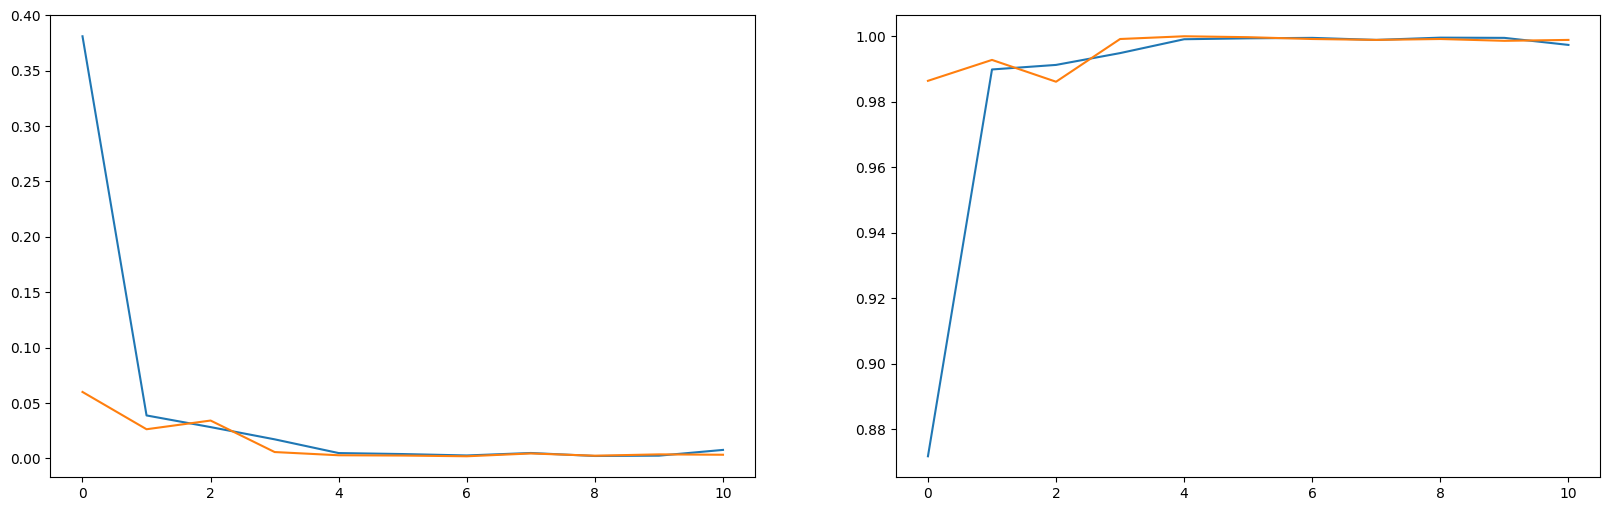

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, InputLayer, Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

EPOCAS = 50
LOTES  = 128
PACIENCIA=4

FN_ACTIVA = LeakyReLU()

# Construye el modelo
model = Sequential()

model.add(Input(shape=IMG_SIZE))
model.add(Conv2D(16, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(FN_ACTIVA)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation=FN_ACTIVA))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation = FN_ACTIVA))
model.add(Dense(N_CLASSES, activation = 'softmax'))

model.summary()

# construye el modelo
optimizer = 'Adam' #optimizers.Adam(0.001)
model.compile(optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])


# parada temprana para evitar el sobreajuste
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=PACIENCIA, restore_best_weights=True)

H = model.fit(
    train_iter,
    validation_data=valid_iter,
    epochs=EPOCAS,
    callbacks=[early_stop],
    verbose=0)

# dibuja accuracy del progreso del entrenamiento
fig, axs = plt.subplots(1,2, figsize=(20,6))

axs[0].plot(H.history["loss"], label="train_loss")
axs[0].plot(H.history["val_loss"], label="val_loss")

axs[1].plot(H.history["accuracy"], label="train_acc")
axs[1].plot(H.history["val_accuracy"], label="val_acc")

# %% evalua el modelo para entrenamiento
pred = model.evaluate(train_iter, verbose=0)
print("\nEfectividad del modelo con datos de entrenamiento: %6.2f%%" % (pred[1]*100))

# evalua el modelo con los datos de testeo
pred = model.evaluate(valid_iter, verbose=0)
print("Efectividad del modelo con datos de Validación...: %6.2f%%" % (pred[1]*100))

# evalua el modelo con los datos de testeo
pred = model.evaluate(test_iter, verbose=0)
print("Efectividad del modelo con datos de Prueba.......: %6.2f%%" % (pred[1]*100))



#### Pruebas con rotaciones

Efectividad del modelo con datos de Prueba rotado -60 grados:  84.38%
Efectividad del modelo con datos de Prueba rotado -55 grados:  87.50%
Efectividad del modelo con datos de Prueba rotado -50 grados:  90.62%
Efectividad del modelo con datos de Prueba rotado -45 grados:  95.31%
Efectividad del modelo con datos de Prueba rotado -40 grados:  96.88%
Efectividad del modelo con datos de Prueba rotado -35 grados:  93.75%
Efectividad del modelo con datos de Prueba rotado -30 grados:  95.31%
Efectividad del modelo con datos de Prueba rotado -25 grados:  93.75%
Efectividad del modelo con datos de Prueba rotado -20 grados:  95.31%
Efectividad del modelo con datos de Prueba rotado -15 grados:  96.88%
Efectividad del modelo con datos de Prueba rotado -10 grados:  98.44%
Efectividad del modelo con datos de Prueba rotado  -5 grados: 100.00%
Efectividad del modelo con datos de Prueba rotado   0 grados: 100.00%
Efectividad del modelo con datos de Prueba rotado   5 grados: 100.00%
Efectividad del mode

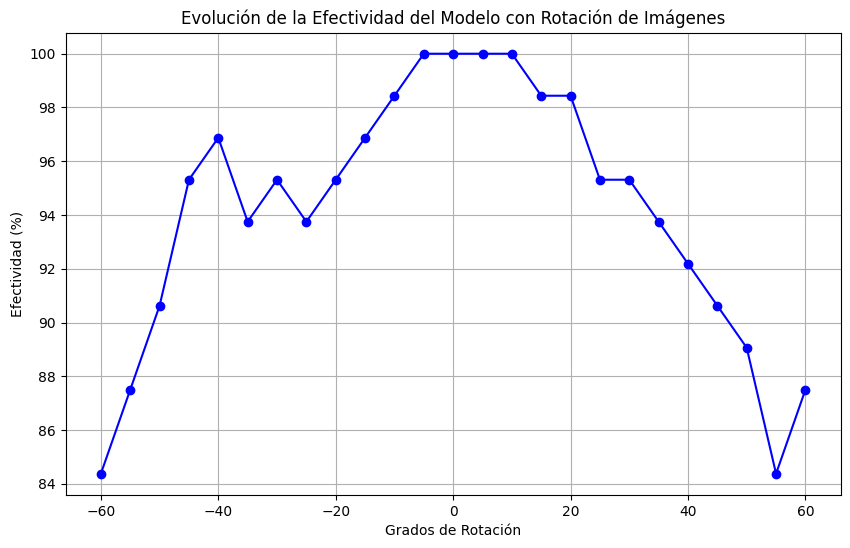

In [5]:
from skimage.transform import rotate

def rotar_grados(data_imgs, ang):
    result = np.empty_like(data_imgs)
    for i, img in enumerate(data_imgs):
        result[i] = rotate(img, ang, resize=False, mode='reflect')
    return result

batch_images, batch_labels = next(test_iter)

# Lista para almacenar los resultados de la efectividad
efectividades = []
grados_rotacion = []

for i in range(25):
    grados = -60 + i * 5
    x_test_rot = rotar_grados(batch_images, grados)

    # Evalúa el modelo con los datos de prueba rotados
    pred = model.evaluate(x_test_rot, batch_labels, verbose=0)
    efectividad = pred[1] * 100
    print("Efectividad del modelo con datos de Prueba rotado %3d grados: %6.2f%%" % (grados, efectividad))

    # Almacena los resultados
    efectividades.append(efectividad)
    grados_rotacion.append(grados)

# Crea el gráfico
plt.figure(figsize=(10, 6))
plt.plot(grados_rotacion, efectividades, marker='o', linestyle='-', color='b')
plt.title('Evolución de la Efectividad del Modelo con Rotación de Imágenes')
plt.xlabel('Grados de Rotación')
plt.ylabel('Efectividad (%)')
plt.grid(True)
plt.show()

### b)

Repita el punto a) utilizando la función **tf.keras.utils.image_dataset_from_directory** para generar el dataset a partir de carpetas en combinación con funciones para aplicar el preprocesamiento/data augmentation.

In [6]:
import tensorflow as tf

LOCAL_DIR = '../../Datos/'

IMG_SIZE = (64, 64, 1)
N_CLASSES = 6
LOTES = 128

# Crear datasets usando tf.data (más moderno y eficiente)
def create_dataset(directory, validation_split=None, subset=None, shuffle=True):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory,
        validation_split=validation_split,
        subset=subset,
        seed=123,
        image_size=(IMG_SIZE[0], IMG_SIZE[1]),
        batch_size=LOTES,
        color_mode='grayscale',
        shuffle=shuffle
    )

    # Normalizar a [0,1] y aplicar data augmentation
    def preprocess(image, label):
        image = tf.cast(image, tf.float32) / 255.0
        return image, label

    def augment(image, label):
        image = tf.image.random_flip_left_right(image)
        #image = tf.image.rando .random_rotation(image, 0.2)  # ~45 grados
        return image, label

    dataset = dataset.map(preprocess)
    if subset == 'training':
        dataset = dataset.map(augment)  # Solo aumentar datos de entrenamiento

    return dataset.cache().prefetch(tf.data.AUTOTUNE)

# Crear datasets
train_ds = create_dataset(
    LOCAL_DIR + 'fingers/train',
    validation_split=0.2,
    subset='training',
    shuffle=True
)

valid_ds = create_dataset(
    LOCAL_DIR + 'fingers/train',
    validation_split=0.2,
    subset='validation',
    shuffle=False
)

test_ds = create_dataset(
    LOCAL_DIR + 'fingers/test',
    shuffle=False
)

Found 18000 files belonging to 6 classes.
Using 14400 files for training.
Found 18000 files belonging to 6 classes.
Using 3600 files for validation.
Found 3600 files belonging to 6 classes.


#### Entrenamiento, Validación y Testeo

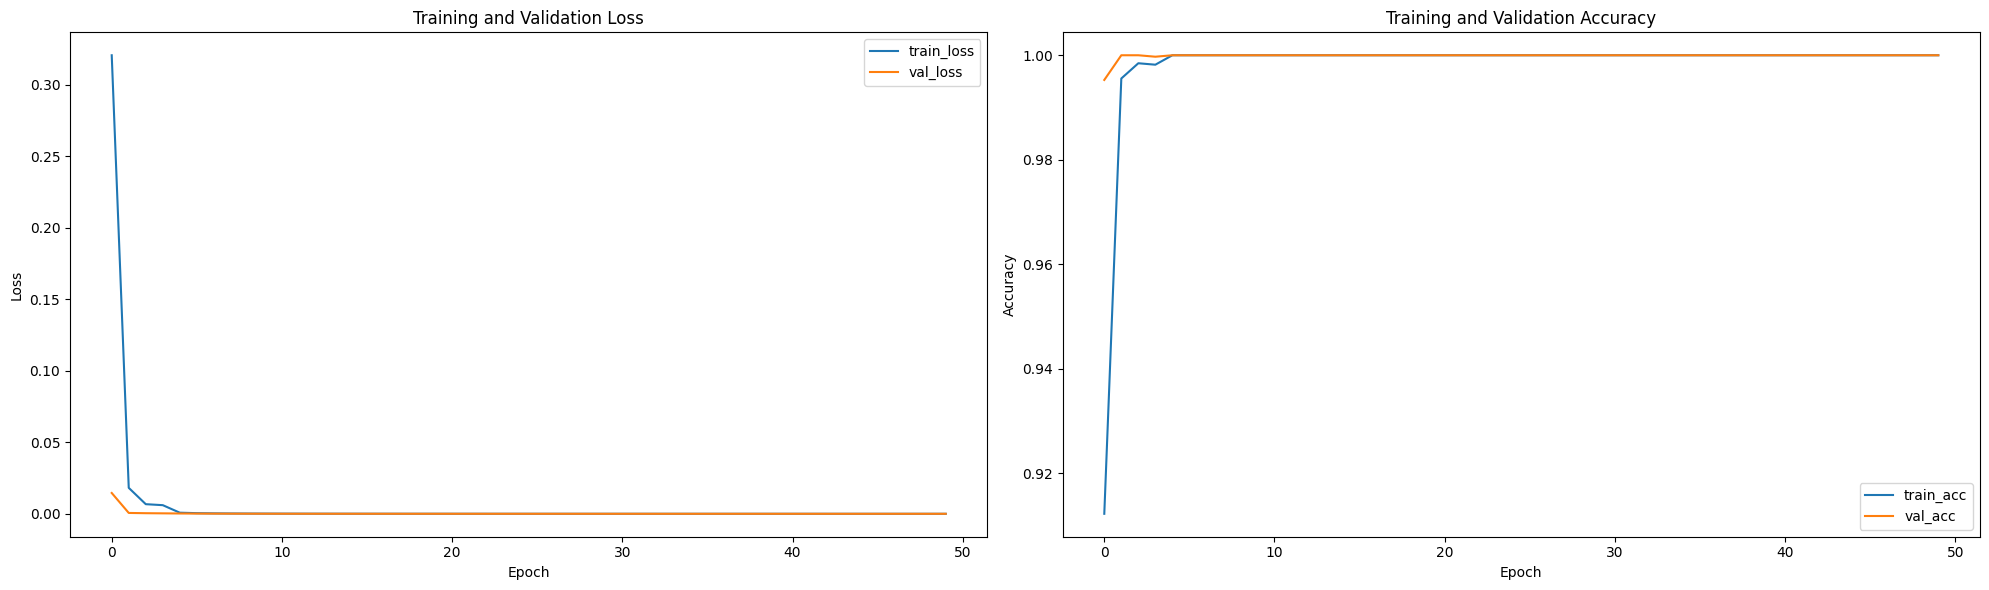


Efectividad del modelo con datos de entrenamiento: 100.00%
Efectividad del modelo con datos de Validación...: 100.00%
Efectividad del modelo con datos de Prueba.......: 100.00%


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras import callbacks, optimizers
import matplotlib.pyplot as plt
import numpy as np


EPOCAS = 50
PACIENCIA = 4

# SOLUCIÓN 1: Usar LeakyReLU como string
model = Sequential()
model.add(Input(shape=IMG_SIZE))
model.add(Conv2D(16, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))  # Cambia a 'relu'
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))  # Cambia a 'relu'
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))  # Cambia a 'relu'
model.add(Dense(N_CLASSES, activation='softmax'))

optimizer = optimizers.Adam(0.001)
model.compile(optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=PACIENCIA, restore_best_weights=True)

# Entrenar (cambia los iteradores por datasets)
H = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=EPOCAS,
    callbacks=[early_stop],
    verbose=0
)

# Dibuja accuracy y loss del progreso del entrenamiento
plt.figure(figsize=(20, 6))

# Gráfico de Loss
plt.subplot(1, 2, 1)
plt.plot(H.history["loss"], label="train_loss")
plt.plot(H.history["val_loss"], label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Gráfico de Accuracy
plt.subplot(1, 2, 2)
plt.plot(H.history["accuracy"], label="train_acc")
plt.plot(H.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# %% Evalúa el modelo
# Datos de entrenamiento
train_results = model.evaluate(train_ds, verbose=0)
print(f"\nEfectividad del modelo con datos de entrenamiento: {100*train_results[1]:6.2f}%")

# Datos de validación
val_results = model.evaluate(valid_ds, verbose=0)
print(f"Efectividad del modelo con datos de Validación...: {100*val_results[1]:6.2f}%")

# Datos de prueba
test_results = model.evaluate(test_ds, verbose=0)
print(f"Efectividad del modelo con datos de Prueba.......: {100*test_results[1]:6.2f}%")